In [1]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt

#import plotly
#import plotly.express as px

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import tqdm
#from functools import lru_cache
#import re
import networkx as nx
from networkx.algorithms import approximation

import MDAnalysis as mda

#import scipy
#import sklearn
#import skimage

#import xml.etree.ElementTree as et
#from Bio.PDB import *
#import nglview as nv

from timeit import default_timer as timer

import sys
import os

# http://nglviewer.org/nglview/latest/api.html
# https://biopython.org/wiki/The_Biopython_Structural_Bioinformatics_FAQ
# https://ambermd.org/tutorials/analysis/tutorial_notebooks/nglview_notebook/index.html
# https://amber-md.github.io/pytraj/latest/_api/pytraj.html

In [2]:
#contact_matrix = np.loadtxt('/home/lillo/TesiCNTE/CNTE/dataset/contact_matrix.txt')   #laptop
#contact_matrix = np.loadtxt('/home/lillo/Code/Tesi/dataset/contact_matrix.txt')        #fisso
#contact_matrix_single = contact_matrix.reshape(100,100,12,12)

#gromacs_output = open('/home/lillo/Code/Tesi/dataset/dm4500Compl_mix1_K2_1%4500ns.gro') #fisso
#gromacs_output = open('/home/lillo/TesiCNTE/CNTE/dataset/dm4500Compl_mix1_K2_1%4500ns.gro') #laptop

#path = '/home/lillo/Code/Tesi/dataset/dm4500Compl_mix1_K2_1%4500ns.gro' #fisso
#path = '/home/lillo/TesiCNTE/CNTE/dataset/dm4500Compl_mix1_K2_1%4500ns.gro' #laptop

# import 2mxu file (beta sheet)

#path_to_mmCIF = open('/home/lillo/TesiCNTE/pdb/2mxu/2mxu.cif')  ## laptop
#path_to_pdb = '/home/lillo/TesiCNTE/pdb/2mxu/2mxu.pdb'  ## laptop
#pa_to_pdb = '/home/lillo/TesiCNTE/pdb/2mxu/2mxu.pdb'  ## laptop

#path_to_mmCIF = open('/home/lillo/Code/Tesi/pdb/2mxu/2mxu.cif')  ## fisso
#path_to_pdb = '/home/lillo/Code/Tesi/pdb/2mxu/2mxu.pdb'  ## fisso
#pa_to_pdb = '/home/lillo/Code/Tesi/pdb/2mxu/2mxu.pdb'  ## fisso

#seed_1_path = '/home/lillo/TesiCNTE/from_cluster/aggregate1.gro' # laptop
#seed_1_path = '/home/lillo/Code/Tesi/dataset/aggregate1.gro'    # Fisso

#prod_gro = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part1/min.gro'            # laptop
#prod_xtc = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part1/prod.xtc'           # laptop
#prod1_xtc = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part2/prod-compl.xtc'    # laptop

prod_gro = '/home/lillo/Code/Tesi/dataset/prod/prod_part1/min.gro'           #fisso
prod_xtc = '/home/lillo/Code/Tesi/dataset/prod/prod_part1/prod.xtc'          #fisso
prod1_xtc = '/home/lillo/Code/Tesi/dataset/prod/prod_part2/prod-compl.xtc'   #fisso


#trj_xtc = '/home/lillo/TesiCNTE/CNTE/trajectory/prd-LDLK12-100mer-out-mol.xtc'  #laptop
#trj_gro = '/home/lillo/TesiCNTE/CNTE/trajectory/min-LDLK12-100mer-out-c.gro'    #laptop

trj_gro = '/home/lillo/Code/Tesi/dataset/trajectory_6_12_19/min-LDLK12-100mer-out-c.gro'     #fisso
trj_xtc = '/home/lillo/Code/Tesi/dataset/trajectory_6_12_19/prd-LDLK12-100mer-out-mol.xtc'   #fisso

lipase = '/home/lillo/Documenti/PDB/lipase/3d2c.pdb'
lipase1 = '/home/lillo/Documenti/PDB/lipase/1gpl.pdb'


glico_6bis_gro = '/home/lillo/Documenti/Tesi_CNTE/data/glicosilati_6bis/6bis-gluc/eq-2-out.gro'
glico_6bis_trr = '/home/lillo/Documenti/Tesi_CNTE/data/glicosilati_6bis/6bis-gluc/production/prd-6bis-GLUC-40mer-3per-out.trr'
glico_6bis_tpr = '/home/lillo/Documenti/Tesi_CNTE/data/glicosilati_6bis/6bis-gluc/production/prd-6bis-GLUC-40mer-3per.tpr'
#p73_2per_wat_seed_1_gro = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.gro'     # laptop
#p73_2per_wat_seed_1_xtc = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.xtc'     # laptop
#p73_2per_wat_seed_1_trr = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.trr'     # laptop

In [3]:
#trj.number_of_BB_atoms

In [4]:
import torch

In [5]:
torch.cuda.is_available()

True

In [6]:
import morphoscanner

In [ ]:
%matplotlib notebook

In [ ]:
_gro = get_gro()
_xtc = get_xtc()

trj = trajectory(_gro, _xtc)

print('Your trajectory has %d frames' % trj.number_of_frames)
print('Your trajectory has %d BB atoms' % trj.number_of_BB_atoms)


peptide_length = peptide_length(sentence='Set the number of aminoacids in one peptide (int): ')
interval = get_interval(sentence='Set the interval between sampled frames (int): ')
start_from = start_from(sentence='Set the index from which you want to start.\n\n0 if you have a single simulation.\n0 if you are analyzing split1.\nlen(split1) if you are analyzing split2.\ninteger: ')

output_path, file_name = get_destination_dir_and_name()


trj.compose_database(peptide_length=peptide_length, interval=interval)
trj.analyze_inLoop()
trj.get_data()
trj.get_database()
    

In [ ]:
t = torch.stack([torch.from_numpy(zero[e]) for e in zero])

In [ ]:
morphoscanner.backend.topology.get_peptide_length_list((trj_gro))

In [ ]:
cleaned = morphoscanner.backend.readGro.clean_gro(trj_gro)

In [ ]:
def dispatch_data(atom):
    
    if type(atom) != list:
        
        raise ValueError("%s is not a list, it is of type %s...\n " % (str(atom), type(atom)))
    
    else:
        
        atom_number = check_int_and_return(atom[0])
        
        residue_number = check_int_and_return(atom[1])
        
        residue_name = atom[2]
        
        x = float(atom[3])
        
        y = float(atom[4])
        
        z = float(atom[5])
        
    
    
        return atom_number, residue_number, residue_name, x, y, z
        
        
        

In [ ]:
dispatch_data(cleaned[0])

In [ ]:
type(cleaned[0]) == list

In [ ]:
import sys


def isInt(s):
    '''Check if s is type int and return bool.
    
    Input: object
    
    Output: bool'''
    
    try:
        return float(str(s)).is_integer()
    except:
        return False

    
    
def check_int_and_return(value):
    
    '''Check int and return value, else raise ValueError and print object type
    
    Input = object
    
    Output = int'''

    if isInt(value):

        return int(value)

    else:
        raise ValueError("%s is not an integer, it is of type %s...\n " % (str(value), type(value))) 


In [ ]:
length_list = morphoscanner.backend.topology.get_peptide_length_list (p73_2per_wat_seed_1_gro)

In [ ]:

c_list = {}
for idx, i in enumerate(peptides_dict[21].atom_numbers.values()):
    p = universe.atoms[i].position
    c_list[idx] = p

In [ ]:
c_list

In [ ]:
type(peptides_dict[0].frame_coordinates)

In [ ]:
### Mi serve un oggetto peptide con sequenza ed atom_number.
### La sequenza la prendo una volta sola e sarà sempre la stessa
### L'atom_number mi serve perché così posso prendermi le coordinate
### dai timestep quando voglio, anche per singolo peptide.

In [ ]:
c_list
first_key = [k for k in peptides_dict][0]
if type(peptides_dict[first_key].frame_coordinates) is dict:
    print('ok')

In [ ]:
def plot_peptide_list(coordinate_dict, peptide_list=None, centroid=False):
    '''
    Plot peptides from a trajectory frame.
    Using jupyter-notebook, use '%matplotlib notebook' to
    plot the points cloud in 3D.

    Parameters
    ----------
    coordinate_dict : dict
        Is the dict that contains all the coordinate
        of the atoms of a single frame.
        A single frame of the output of 
        backend.topology.get_coordinate_dict_from_trajectory 
        is a coordinate_dict.
        
    peptide_list : list, optional
        The default is None. By default all the peptides
        will be plotted.
            Is a list of int. Put here the index of the peptide
            or peptides that you want to plot.
            For example [0,2,5,24,1,6] to plot
            only these peptides.
        
    centroid : bool, optional
        The default is False.
            The centroid of a peptide can be plotted
            in red together with the selected peptide.
    
    Returns
    -------
    3D plot
        Return a scattered 3D plot.

    '''
    
      
    # if no peptide specified, plot all
    if peptide_list == None:
        peptide_list = [p for p in coordinate_dict]


    # if there is only a single peptide to show
    # use the single peptide function to normalize axis        
    if len(peptide_list) == 1:
        
        return plot_single_peptide(coordinate_dict[peptide_list[0]])
    
    else:
        
        x = []
        y = []
        z = []
        x_median = float
        y_median = float
        z_median = float


        for peptide in range(len(peptide_list)):
            x.append([peptide])
            y.append([peptide])
            z.append([peptide])
            for aminoacid in coordinate_dict[peptide_list[peptide]]:

                point = coordinate_dict[peptide_list[peptide]][aminoacid]
                x[peptide].append(point[0])
                y[peptide].append(point[1])
                z[peptide].append(point[2])

            del x[peptide][0]
            del y[peptide][0]
            del z[peptide][0]

        if centroid == True:

            def assemble_coordinate(axis_coordinate_list):
                median_list = []
                for coordinate_set in axis_coordinate_list:
                    median = np.median(coordinate_set)
                    median_list.append(median)
                return median_list

            x_median = assemble_coordinate(x)
            y_median = assemble_coordinate(y)
            z_median = assemble_coordinate(z)


        #%matplotlib notebook

        fig = plt.figure()

        ax = plt.axes(projection='3d')


        for pep in range(len(x)):

            ax.scatter3D(x[pep],y[pep],z[pep])

            if centroid == True:

                ax.scatter3D(x_median[pep], y_median[pep], z_median[pep], c='red')


        #return  plt.show(), [x,y,z], [x_median, y_median, z_median]         
    return plt.show()


In [ ]:
%matplotlib notebook

In [ ]:
morphoscanner.plot.plot.plot_single_peptide(c_list)

In [ ]:
plot_protein(c_list)

In [ ]:
#plot from trajectory positions  ### WORKING BUT YOU NEED TO:
# make_universe
# positions = universe.select_atoms('name BB').positions
def plot_peptide_from_trajectory_frame(positions, peptide_list=None, centroid=False):
    
    '''
    Plot atoms from universe.trajectory[frame]
    '''
       
    if peptide_list == None:
        
        peptide_list = [e for e in range(len(positions))]

    x = []
    y = []
    z = []

    for peptide in range(len(peptide_list)):
        x.append([peptide])
        y.append([peptide])
        z.append([peptide])

        point = positions[peptide_list[peptide]]
        #print(peptide, point)
        x[peptide].append(point[0])
        y[peptide].append(point[1])
        z[peptide].append(point[2])

        del x[peptide][0]
        del y[peptide][0]
        del z[peptide][0]

    fig = plt.figure()

    ax = plt.axes(projection='3d')

    for pep in range(len(x)):

        # scatter points, making list from torch tensor item
        ax.scatter3D([e.item() for e in x[pep]],[e.item() for e in y[pep]],[e.item() for e in z[pep]])

    return plt.show()

In [ ]:
from morphoscanner import backend

In [ ]:
universe = mda.Universe(trj_gro, trj_xtc, in_memory=False)

In [ ]:
a = universe.trajectory[150].positions

In [ ]:
b = universe.trajectory[150].positions

In [ ]:
a == b

In [ ]:
def plot_peptide_list(coordinate_dict, peptide_list=None, centroid=False):
    '''Plot peptides from a trajectory frame.
        Using jupyter-notebook, use '%matplotlib notebook' to
        plot the points cloud in 3D.
    
    Inputs:     coordinate_dict, dict   Is the dict that contains all the coordinate
                                        of the atoms of a single frame.
                                        A single frame of the output of 
                                        backend.topology.get_coordinate_dict_from_trajectory 
                                        is a coordinate_dict.
    
                peptide_list, list.     is a list of int. Put here the index of the peptide
                                        or peptides that you want to plot
                                
                centroid,   bool.       default=False 
                                        The centroid of a peptide can be plotted
                                        in red together with the selected peptide.
                                           
    Return:     show a 3D plot
    '''
    
    # if there is only a single peptide to show
    # use the single peptide function to normalize axis    
    
    if peptide_list == None:
        peptide_list = [p for p in coordinate_dict]
    
    
    if len(peptide_list) == 1:
        
        return plot_single_peptide(coordinate_dict[peptide_list[0]])
    
    else:
        
        x = []
        y = []
        z = []
        x_median = float
        y_median = float
        z_median = float


        for peptide in range(len(peptide_list)):
            x.append([peptide])
            y.append([peptide])
            z.append([peptide])
            for aminoacid in coordinate_dict[peptide_list[peptide]]:

                point = coordinate_dict[peptide_list[peptide]][aminoacid]
                x[peptide].append(point[0])
                y[peptide].append(point[1])
                z[peptide].append(point[2])

            del x[peptide][0]
            del y[peptide][0]
            del z[peptide][0]

        if centroid == True:

            def assemble_coordinate(axis_coordinate_list):
                median_list = []
                for coordinate_set in axis_coordinate_list:
                    median = np.median(coordinate_set)
                    median_list.append(median)
                return median_list

            x_median = assemble_coordinate(x)
            y_median = assemble_coordinate(y)
            z_median = assemble_coordinate(z)


        #%matplotlib notebook

        fig = plt.figure()

        ax = plt.axes(projection='3d')


        for pep in range(len(x)):

            ax.scatter3D(x[pep],y[pep],z[pep])

            if centroid == True:

                ax.scatter3D(x_median[pep], y_median[pep], z_median[pep], c='red')


        #return  plt.show(), [x,y,z], [x_median, y_median, z_median]         
    return plt.show()

In [ ]:
l1 = [i for i in range(100,1001,100)]

In [ ]:
l2 = [i for i in range(10,101,10)]

In [ ]:
check_for_compatibility(to_split,split_size)

In [ ]:
from morphoscanner.backend.check_val import check_int_and_return, isInt

In [ ]:
import sys

In [ ]:
len_dict = morphoscanner.backend.topology.get_peptide_length_dict(peptide_length_list)

In [ ]:
len_dict.get(96)

In [ ]:
ask_for_splitting()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as px 
import plotly.graph_objects as go

def plot_protein(coordinate_dict):
    x = []
    y = []
    z = []

    for residue in coordinate_dict:
        point = coordinate_dict[residue]
        x.append(point[0])
        y.append(point[1])
        z.append(point[2])


    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)

    fig = go.Figure(data = [go.Scatter3d (x = x, y = y, z= z)])
    return fig.show()

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap = 'viridis', interpolation = 'nearest')
    plt.colorbar()
    return plt.show()

def get_euclidean_distance(point_1, point_2):

    euclidean_distance = np.sqrt(np.sum([((point_1[0] - point_2[0])**2), ((point_1[1] - point_2[1])**2), ((point_1[2] - point_2[2])**2)]))

    return euclidean_distance

def compute_distance_map(coordinate_dict):
    i = 0
    distance_map = np.zeros((len(coordinate_dict),len(coordinate_dict)))
    for  i  in range(i, len(coordinate_dict)-1):
        coordinate_1 = coordinate_dict[i] 
        for j in range(0, len(coordinate_dict)-1):
            coordinate_2 = coordinate_dict[j]
            euclidean_distance = get_euclidean_distance(coordinate_1, coordinate_2)
            distance_map[i][j] = euclidean_distance
            distance_map[j][i] = euclidean_distance
    return distance_map

def contact_map_helix(distance_map):
    contact_map = np.zeros((len(distance_map),len(distance_map)))
    for i in range(1, len(distance_map)-1):
        for j in range(1, len(distance_map)-1):
            if 0.45 < distance_map[i][j] < 0.46:
                contact_map[i][j] = 1
            elif 0.52 < distance_map[i][j] < 0.56:
                contact_map[i][j] = 2
    return contact_map

            
    
    
    
    
    

In [ ]:
to_split = check_input_multiple_int_recursive_with_sentence('Write the length of the peptides that you want to split (as an integer): ')

In [ ]:
to_split

In [ ]:
import sys


def isInt(s):
    '''Check if s is type int and return bool.
    
    Input: object
    
    Output: bool'''
    
    try:
        return float(str(s)).is_integer()
    except:
        return False

    
    
def check_int_and_return(value):
    
    '''Check int and return value, else raise ValueError and print object type
    
    Input = object
    
    Output = int'''

    if isInt(value):

        return int(value)

    else:
        raise ValueError("%s is not an integer, it is of type %s...\n " % (str(value), type(value))) 


        
##############################
#############################
##############################


def ask_for_splitting(limit=5):

    answer = input("Do you want to split peptides? Write 'yes' or 'no': ")
    
    if answer not in {'n','no','y','yes'}:
        print('This is not a valid answer, please write yes or no.\n'
            '%d trial left.' % limit)
        limit -= 1
        if limit == 0:
            raise sys.exit('Too many wrong inputs. Closing...')
        else:
            return ask_for_splitting(limit=limit)

    elif answer in {'n', 'no'}:
        print('The .gro topology file is set as reference for the analysis')
        return False

    elif answer in {'y', 'yes'}:
        return True



def check_input_multiple_int_recursive_with_sentence(sentence, limit=5):
    
    value = input(sentence)
    input_list = value.split()
    
    if len(input_list) == 0:
        limit -= 1
        
        if limit == 0:
            raise sys.exit("Too many empty inputs. Closing...")
        else:
            print('%d trial left.\n'
                  'You forgot to insert a value...please retry.' % limit)
            return check_input_multiple_int_recursive_with_sentence(sentence=sentence, limit=limit)
    
    else:
        va_list = []
        for val in input_list:
            
            if isInt(val):
                va_list.append(int(val))
        
                
            else:
                limit -= 1
                print('%d trial left.' % (limit))
                if limit == 0:
                    raise sys.exit("%s is not an integer, it is of type %s...\nClosing... " % (str(val), type(val))) 
                else:
                    print("%s is not an integer, it is of type %s...\n " % (str(val), type(val)))
                    return check_input_multiple_int_recursive_with_sentence(sentence=sentence, limit=limit)
        
        return va_list
    
    
def check_for_compatibility(list1, list2):
    if len(list1) == len(list2):
        
        for e1, e2 in zip(list1, list2):
            if e1%e2 != 0:
                print('%d is not multiple of %d' % (e1,e2))
                return False
            
        
        else:
            return True
    
    else:
        raise ValueError('Your lists are of different len! list1 len = %d, list2 len = %d.' % (len(list1), len(list2)))


def get_splitting_dict(to_split, split_size):
    
    splitting_dict = {}
    
    for length, split_dim in zip(to_split, split_size):
        #check for divisibility
        if (length%split_dim) == 0:
            splitting_dict[length] = split_dim
    
    return splitting_dict

def get_new_peptides_length(peptide_length_list, splitting_dict):
    new_peptide_list = []
    for pep_length in peptide_length_list:
        if pep_length in splitting_dict.keys():
            new_size = splitting_dict[pep_length]
            new_peptide_list.extend([splitting_dict[pep_length] for p in range((pep_length//new_size))])
        else:
            new_peptide_list.append(pep_length)
    
    return new_peptide_list


#####################################
####################################+
#####################################

#to complete
# i want to get frame and the tensor inside frame object
# then continue analysis

class frames():
    
    def __init__(self, frame):
        
        self.frame = frame
        
        pass
        
        
#        frame_dict = self.get_frame(frame)
#        frame_tensor = distance_tensor.get_coordinate_tensor_from_dict_multi(frame_dict)
#        frame_tensor = distance_tensor.cat_tensor_for_size(frame_tensor)
     
    def get_frame(self):

        a_frame = {}
        for pep in super().frames[self.frame].peptides:
            a_frame[pep] = super().frames[self.frame].peptides[pep].coordinates
        
        
  #  def get_tensor(self):
   #     frame_dict = 
    #    frame_tensor = distance_tensor.get_coordinate_tensor_from_dict_multi(frame_dict)
    #    frame_tensor = distance_tensor.cat_tensor_for_size(frame_tensor)

#    return a_frame


    #def frame_tensor()
    
    
        pass
    
        

# Classes in dev

class single_peptide():
    
    ''' Class that define peptides
    
    '''
    
    def __init__(self, sequence, atom_n, coordinates):
        
        self.sequence = sequence
        self.atom_numbers = atom_n
        self.coordinates = coordinates
        
        return

    def get_coordinate_from_frame(self, coordinates):
        
        self
        
    #do this for each peptide to gather distances
    # this is not optimized but still faster than before
    def distance(self):
        

        self.distances = {}
        for tens in frame_tensor:

            dists[tens] = fast_cdist(frame_tensor[tens], tt.unsqueeze(0))

        return dists

In [ ]:
# old one
def get_data_from_trajectory_frame_v1(universe, frame, peptide_length_list, atom_to_select='BB'):

    # move universe frame to memory
    universe.trajectory[frame]

    coordinate_dict = {}
    residues_dict = {}
    atom_number_dict = {}
    
    res_counter = 0
    object_dict = {} # new
    #print(length_list)
    for pep_index, peptide in enumerate(peptide_length_list):

        coordinate_dict[pep_index] = {}
        residues_dict[pep_index] = {}
        atom_number_dict[pep_index] = {}
        
        for res in range(peptide):

            actual_res = universe.residues[res_counter]
            
            for index, atom in enumerate(actual_res.atoms):

                atom_type = str(atom).split()[2]

                if atom_type == atom_to_select:
                    
                    atom_number = (int(str(atom).split()[1].split(':')[0]) - 1)

                    residue_name = (str(atom).split()[8].split(',')[0])

                    coordi = universe.atoms[atom_number].position

                    coordinate_dict[pep_index][res] = coordi
                    residues_dict[pep_index][res] = residue_name
                    atom_number_dict[pep_index][res] = atom_number
                    
                    res_counter += 1
        
        object_dict[pep_index] = single_peptide(residues_dict[pep_index], atom_number_dict[pep_index], coordinate_dict[pep_index])
        
                    
    return object_dict
    #return residues_dict, atom_number_dict

In [ ]:
sum(new_peptide_list)

In [ ]:
sum(peptide_length_list)

In [ ]:
universe = morphoscanner.backend.topology.make_universe(trj_gro,trj_xtc)
peptide_length_list = morphoscanner.backend.topology.get_peptide_length_list(trj_gro)
len_dict = morphoscanner.backend.topology.get_peptide_length_dict(peptide_length_list)
morphoscanner.backend.topology.print_peptides_length(len_dict)
have_to_split = ask_for_splitting()
if have_to_split:
    to_split = check_input_multiple_int_recursive_with_sentence('Write the length of the peptides that you want to split (as integer or list of integer separated by a space): ')
    split_size = check_input_multiple_int_recursive_with_sentence('\nWrite the length in which you want to split your peptides (as integer or list of integer separated by a space).\n'
                                                                 'The list should be of the same length of the list above, \nthe numbers have to be divisors of the numbers inserted above. ')
    compatible = check_for_compatibility(to_split, split_size)
    if compatible:
        splitting_dict = get_splitting_dict(to_split, split_size)
        new_peptides_length = get_new_peptides_length(peptide_length_list, splitting_dict)
        print('Splitting done!')

In [ ]:
have_to_split = ask_for_splitting()

In [ ]:
class results():
    
    def __init__(self, frame):
        self.frame = frame
        pass

    #def get_data(self, data_name, data):
        
    #    setattr(self, data_name, data)

In [ ]:
class results():
    def __init__(self, frame):
    
        frame = frame
        print('Analyzing frame n° ', frame)
    
        frame_dict = self.get_frame(frame)
    
        frame_tensor = distance_tensor.get_coordinate_tensor_from_dict(frame_dict)
    
        start_dist = timer()
        frame_distance_maps = distance_tensor.compute_euclidean_norm_torch(frame_tensor)
        end_dist = timer()
        print('Time to compute distance is: ', (end_dist - start_dist))
    
        start_contc = timer()
        frame_contact = pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
        end_contc = timer()
        print('Time to compute contact is: ', (end_contc - start_contc))
    
        start_den = timer()
        frame_denoised, df = pattern_recognition.denoise_contact_maps(frame_contact)
        end_den = timer()
        print('Time to denoise: ', (end_den-start_den))
    
        frame_graph_full = graph.graph_v1(frame_denoised, df)
        setattr(self, 'graph', frame_graph_full)
        
        subgraphs = find_subgraph(frame_graph_full)        
        setattr(self, 'subgraph', subgraph)

In [ ]:
from morphoscanner import backend, data_acquisition, trj_object
from morphoscanner.backend import distance_tensor, pattern_recognition, graph

from morphoscanner.backend.check_val import isInt
import sys


class trajectory:
    '''Class to operate on trajectory files.

    It makes an object that contain the trajectory of the simulation'''

    def __init__(self, trj_gro, trj_xtc, select = None):
        
        self.trj_gro = trj_gro
        self.trj_xtc = trj_xtc
        self.universe = backend.topology.make_universe(self.trj_gro, self.trj_xtc)
        self.number_of_frames = len(self.universe.trajectory)
        #self.number_of_BB_atoms = len(self.universe.select_atoms('name BB'))
        
        if select == None:
            select = 'peptide'
            
        self.select = select
       
        self.peptide_length_list = backend.topology.get_peptide_length_list(self.trj_gro, self.select)
        
        self.len_dict = backend.topology.get_peptide_length_dict(self.peptide_length_list)
        
        print('In your trajectory there are %d frames.\n' % self.number_of_frames)
        #print('In each frame there are %d BB atoms.\n' % self.number_of_BB_atoms)
        morphoscanner.backend.topology.print_peptides_length(self.len_dict)
        
        return
        
        
    def split(self, to_split: list, split_size: list):
        '''Manually split peptide_length_list in case of seeds.
        
        Input:
            to_split: list
                list of int or ints.
                Each int refers to the length of a peptides seed
                from self.len_dict.keys() that you want to split in single peptide.
                For example if in len dict there are seeds of length 96 that you want to split,
                to_split = [96]
                
            split_size: list
                list of int or ints.
                This is the size in which you want to split your to_split seeds.
                For example if you want to split your seeds of length 96 in peptides of length 12,
                split_size = [12]
                
        Output:
            Change the original self.peptide_length_list with a new list of splitted peptides.
        
        '''
        
        splitting_dict = data_acquisition.script_inputs.get_splitting_dict(to_split, split_size)
        self.peptide_length_list = data_acquisition.script_inputs.get_new_peptides_length(self.peptide_length_list, splitting_dict)
        print('Splitting done.\n')
        print('"peptide_length_list" attribute has been updated with the new length.')
        
        return    
    
    def explore(self):
        # v1 with frame priority

        frame = 0
        self.frames = {}
        self.frames[frame] = frames(frame)
        self.frames[frame].peptides = morphoscanner.backend.topology.get_data_from_trajectory_frame_v1(universe=self.universe, frame=frame, peptide_length_list=self.peptide_length_list, select=self.select)
        print('Exploration of frame %d done.\n' % frame)

        return    
    
    def compose_database(self, sampling_interval=1):
        
        steps = [s for s in range(self.number_of_frames) if s%sampling_interval==0 and s != 0]
        for step in tqdm.tqdm(steps):
            self.universe.trajectory[step]
            self.frames[step] = frames(step)
            self.frames[step].peptides = {}
            for pep in self.frames[0].peptides:
                c_list = {}

                for idx, i in enumerate(self.frames[0].peptides[pep].atom_numbers.values()):
                    p = self.universe.atoms[i].position
                    c_list[idx] = p

                self.frames[step].peptides[pep] = single_peptide(self.frames[0].peptides[pep].sequence,self.frames[0].peptides[pep].atom_numbers,c_list)

        return
        
    def get_frame(self, frame):
        
        a_frame = {}

        for pep in self.frames[frame].peptides:
            a_frame[pep] = self.frames[frame].peptides[pep].coordinates

        return a_frame
    
    def get_peptide(self, peptide):
    
        a_peptide = {}
        for frame in self.frames:
            
            a_peptide[frame] = self.frames[frame].peptides[peptide].coordinates
            
        return a_peptide
    
    def analysis(self, frame):
    
        frame = frame
        print('Analyzing frame n° ', frame)
    
        frame_dict = self.get_frame(frame)
    
        frame_tensor = distance_tensor.get_coordinate_tensor_from_dict(frame_dict)
    
        start_dist = timer()
        frame_distance_maps = distance_tensor.compute_euclidean_norm_torch(frame_tensor)
        end_dist = timer()
        print('Time to compute distance is: ', (end_dist - start_dist))
    
        start_contc = timer()
        frame_contact = pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
        end_contc = timer()
        print('Time to compute contact is: ', (end_contc - start_contc))
    
        start_den = timer()
        frame_denoised, df = pattern_recognition.denoise_contact_maps(frame_contact)
        end_den = timer()
        print('Time to denoise: ', (end_den-start_den))
    
        frame_graph_full = graph.graph_v1(frame_denoised, df)
        
        subgraphs = graph.find_subgraph(frame_graph_full)        

        
        try:
            self.results[frame] = results(frame)       

        except:
            self.results = {}
            self.results[frame] = results(frame)       

        self.results[frame].graph = frame_graph_full
        self.results[frame].subgraphs = subgraphs
        self.results[frame].cross_correlation = df
        
        print('Finished analysis of frame n° %d' % frame)
        

In [ ]:
t_test = trajectory(trj_gro, trj_xtc)

In [ ]:
#t_test.split([96],[12])

In [ ]:
t_test.explore()

In [ ]:
t_test.compose_database(1)

In [ ]:
t_test.analysis(150)

In [ ]:
import networkx as nx

In [ ]:
nx.draw_networkx(t_test.results[150].graph)

In [ ]:
morphoscanner.plot.plot.plot_peptide_list(t_test.get_frame(150))

In [ ]:
# assemble a coordinate dict for each frame for a peptide
# assemble a coordinate dict for each peptide in a single frame

In [ ]:
%matplotlib notebook

In [ ]:
a_frame = {}

for pep in t_test.frames[150].peptides:
    a_frame[pep] = t_test.frames[150].peptides[pep].coordinates

In [ ]:
t_test.frames[0].peptides[15].coordinates

In [ ]:
morphoscanner.plot.plot.plot_single_peptide(t_test.frames[0].peptides[16].coordinates)

In [ ]:
# Instantiate universe and peptide list
universe = morphoscanner.backend.topology.make_universe(trj_gro,trj_xtc)
peptide_length_list = morphoscanner.backend.topology.get_peptide_length_list(trj_gro)


coordinate, sequence, atom_number = get_data_from_trajectory_frame(universe, 0, peptide_length_list)

peptides_dict = {}
for seq, coord, atm_n in zip(sequence, coordinate, atom_number):

    peptides_dict[seq] = single_peptide(sequence.get(seq), atom_number.get(atm_n))
    
    actual_frame = universe.trajectory.trajectory.frame
    
    peptides_dict[seq].get_coordinate_from_frame(frame=actual_frame, coordinates=coordinate.get(coord))

    
start = timer()
for step in steps:
    universe.trajectory[step]
    
    for pep in peptides_dict:
        c_list = {}
        
        for idx, i in enumerate(peptides_dict[pep].atom_numbers.values()):
            p = universe.atoms[i].position
            c_list[idx] = p
            
        peptides_dict[pep].get_coordinate_from_frame(step, c_list)
        
end = timer()
print(end-start)


In [ ]:
morphoscanner.plot.plot.plot_peptide_list(t_test.get_peptide(0))

In [ ]:
peptides_dict[0].frames.keys()

In [ ]:
#steps = [i for i in range(universe.trajectory.n_frames) if i%10 == 0]
steps = [i for i in range(universe.trajectory.n_frames)]


In [ ]:
single_process_dict = peptides_dict

In [ ]:
import os
import multiprocessing
from multiprocessing import Pool

#multiprocessing.cpu_count()
available_cpu = len(os.sched_getaffinity(0))

In [ ]:
t_test.peptide[0].frames[0]

In [ ]:
def analysis(frame):

    # WHY len(frame_denoised) is len(frame_dict)-1 ???????
    
    frame = frame
    print('Analyzing frame n° ', frame)

    frame_dict = t_test.get_frame(frame)

    frame_tensor = backend.distance_tensor.get_coordinate_tensor_from_dict(frame_dict)

    start_dist = timer()
    frame_distance_maps = backend.distance_tensor.compute_euclidean_norm_torch(frame_tensor)
    end_dist = timer()
    print('Time to compute distance is: ', (end_dist - start_dist))

    start_contc = timer()
    frame_contact = backend.pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
    end_contc = timer()
    print('Time to compute contact is: ', (end_contc - start_contc))

    start_den = timer()
    frame_denoised, df = backend.pattern_recognition.denoise_contact_maps(frame_contact)
    end_den = timer()
    print('Time to denoise: ', (end_den-start_den))

    #frame_graph = backend.graph.nx_graph_search(self.frame_denoised)
    
    frame_graph_full = backend.graph.graph_v1(frame_denoised, df)

    subgraphs = backend.graph.find_subgraph(frame_graph_full)

    self.[frame] = results.get_data(self, 'graph', frame_graph_full)
    self.results[frame].get_data(self, 'subgraph', subgraphs)
             

In [ ]:
t_test.explore()

In [ ]:
a_dict = {}

In [ ]:
a_dict.update({'a':1, 'b':2})

In [ ]:
a_dict

In [ ]:
a_dict.update({'c':3, 'd':4, 'e': {'a':1, 'b':2, 'c':3}})

In [ ]:
a_dict

In [ ]:
class frames(object):
    
    pass
    
    
    #def __init__(self, coordinates):
        
        #self.coordinates = coordinates
        
        
        

# Classes in dev

class single_peptide():
    
    ''' Class that define peptides
    
    '''
    
    def __init__(self, seq, atom_n):
        
        self.sequence = seq
        self.atom_numbers = atom_n
        #self.frames_coordinates = frames()
        
        return
    
    
#    def get_coordinate_from_frame(self, frame, coordinates):
#        
#        name = 'frame_' + str(frame)
#
#        setattr(self.frames_coordinates, name, coordinates)
#        
#        return
    
    def get_coordinate_from_frame(self, frame, coordinates):
        
        
        try:
            self.frames[frame] = coordinates
        except:
            self.frames = {}
            self.frames[frame] = coordinates
        return

In [29]:
### USING THIS ONE
# to complete
# i want to get frame and the tensor inside frame object
# then continue analysis

class frames():
    
    def __init__(self, frame):
        
        self.frame = frame
        
        pass
        

    def get_frame(self):

        a_frame = {}
        for pep in super().frames[self.frame].peptides:
            a_frame[pep] = super().frames[self.frame].peptides[pep].coordinates    
    
        pass
    
# save results in this

class results():
    
    pass
    
        

# Classes in dev

class single_peptide():
    
    ''' Class that define peptides
    
    '''
    
    def __init__(self, sequence, atom_n, coordinates):
        
        self.sequence = sequence
        self.atom_numbers = atom_n
        self.coordinates = coordinates
        
        return

    # do this for each peptide to gather distances
    # this is not optimized but still faster than before#
#    def distance(self):
#        
#        tt = distance_tensor.get_coordinate_tensor_from_dict_single(t_test.frames[0].peptides[0].coordinates)
#
#        self.distances = {}
#        for tens in frame_tensor:

#            dists[tens] = morphoscanner.backend.distance_tensor.fast_cdist(frame_tensor[tens], tt.unsqueeze(0))

#        return dists
        

In [ ]:
## WORKING NICELY FAST #old
def get_data_from_trajectory_frame_v1(universe, frame, peptide_length_list, atom_to_select='BB'):

    # move universe frame to memory
    universe.trajectory[frame]

    coordinate_dict = {}
    residues_dict = {}
    atom_number_dict = {}
    
    res_counter = 0
    object_dict = {} # new
    #print(length_list)
    for pep_index, peptide in enumerate(peptide_length_list):

        coordinate_dict[pep_index] = {}
        residues_dict[pep_index] = {}
        atom_number_dict[pep_index] = {}
        
        for res in range(peptide):

            actual_res = universe.residues[res_counter]
            
            for index, atom in enumerate(actual_res.atoms):

                atom_type = str(atom).split()[2]

                if atom_type == atom_to_select:
                    
                    atom_number = (int(str(atom).split()[1].split(':')[0]) - 1)

                    residue_name = (str(atom).split()[8].split(',')[0])

                    coordi = universe.atoms[atom_number].position

                    coordinate_dict[pep_index][res] = coordi
                    residues_dict[pep_index][res] = residue_name
                    atom_number_dict[pep_index][res] = atom_number
                    
                    res_counter += 1
        
        object_dict[pep_index] = single_peptide(residues_dict[pep_index], atom_number_dict[pep_index], coordinate_dict[pep_index])
        
                    
    return object_dict
    #return residues_dict, atom_number_dict

In [ ]:
"""
@author: lillo
"""
import numpy as np
import torch

def get_coordinate_from_pdb(file):
    '''
    Parse a pdb file. Support single chain and multiple chain

    Parameters
    ----------
    file : str
        The path of the .pdb file in your system.

    Returns
    -------
    coordinate_dict : dict
        A dict of dict with the coordinate of each atom of the pdb file.
        
        Depending on the input file it has different levels of nesting:
            
            for single chain:
                atom_index : [x,y,z]
                
            for multiple chain:
                
                chain_index : {atom index : [x,y,z]}
    '''
    
    with open(file) as pdbfile:

        coordinate_dict = {}
        atom_count_dict = {}
        start = 0

        for line in pdbfile:
            
            # split line
            splitted_line = [line[:6], line[6:11], line[12:16], line[17:20], line[21], line[22:26], line[30:38], line[38:46], line[46:54]]
            # get line header
            line_id = splitted_line[0].split()[0]
            
            #check for atom and heteroatom
            if line_id in {'ATOM', 'HETATM'}:
                
                # get CA atom only
                if splitted_line[2].split()[0] in {'CA'}:
                    
                    # get atom num for indexing
                    atom_num = int(splitted_line[5])
                    # get protein chain for indexing
                    chain = splitted_line[4]
                    # get coordinates
                    x, y, z = float(splitted_line[6]), float(splitted_line[7]), float(splitted_line[8])
                    
                    # check if actual chain already has an entry in coordinate_dict
                    if chain not in coordinate_dict.keys():
                        
                        # index from 'start'
                        atom_count_dict[chain] = start
                        # create key for new chain
                        coordinate_dict[chain] = {}
                        # put actual atom coordinates in coordinate_dict
                        coordinate_dict[chain][atom_count_dict[chain]] = np.array([x,y,z])
                    # if actual chain already in coordinate_dict
                    else:
                        # move index forward
                        atom_count_dict[chain] += 1
                        # add the atom coordinates
                        coordinate_dict[chain][atom_count_dict[chain]] = np.array([x,y,z])

    # if there is only one chain, flat the dict
    if len(coordinate_dict) == 1:
        coordinate_dict = coordinate_dict.get([k for k in coordinate_dict][0])

    return coordinate_dict


def get_coordinate_tensor_from_dict(coordinate_dict, device='cuda'):
    '''
        Convert a coordinate_dict to a torch.tensor, for parallel euclidean distance calculation.
        Works on dict in the form {atom_key : [x, y, z]}

    Parameters
    ----------
    coordinate_dict : dict
        Is the coordinate_dict in the form {key : [x, y, z]}.
        It also works for N-dimensional points.

    Returns
    -------
    zero : torch.tensor
        Returns a torch.tensor of shape n x m
        'n'  are the keys in coordinate_dict al len(coordinate_dict)
        'm' is the number of dimensions of your data points
        
        It save on gpu if torch.cuda.is_available(), else on cpu
        If you want to move your data on cpu, e.g. for visualization,
        you need to output_tensor.cpu()
    '''
    

    #variables with dict dimension
    dim0 = len(coordinate_dict)
    first_key = [k for k in coordinate_dict.keys()][0]
    dim1 = len(coordinate_dict[first_key])

    #initialize a 0s tensor
    #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    zero = torch.zeros([dim0,dim1], dtype=torch.float32, device=device)

    for index, peptide in enumerate(coordinate_dict):
            
        zero[index] = torch.tensor(coordinate_dict[peptide], device=device)
                
    return zero


def get_tensors_from_multichain_dict(coordinate_dict):
    '''
    Generate tensor from multichain coordinate dict.
    Your coordinate_dict is in the form:
        
        {chain : {atom : [x, y, z] }}

    Parameters
    ----------
    coordinate_dict : dict
        Your coordinate_dict.
        It is in the form:
        {chain : {atom : [x, y, z] }}.

    Returns
    -------
    tensor_dict : dict
        It is a dict of tensor, one tensor per chain.

    '''
    tensor_dict = {}
    for chain in coordinate_dict:
        tensor_dict[chain] = get_coordinate_tensor_from_dict(coordinate_dict[chain])
    return tensor_dict


def distance_matrix_from_2d_tensor(peptide1_tensor, peptide2_tensor=None, device='cpu'):
    '''
    Minimal function to calculate euclidean distance between two set of points
    using quadratic expansion. Thanks to:
            https://discuss.pytorch.org/t/efficient-distance-matrix-computation/9065
            https://github.com/pytorch/pytorch/pull/25799
            https://github.com/pytorch/pytorch/issues/15253
    

    Parameters
    ----------
    peptide1_tensor : torch.tensor
        torch.tensor of shape n x d.
        
    peptide2_tensor : torch.tensor, optional
        The default is None.
        torch.tensor for which you want to calculate te distance from peptide1_tensor
        shape m x p
        
    device : str, optional
        Options: 'cpu', 'cuda'
        The default is 'cpu'.
        
        Is the device on which to compute the calculation.
        You can set it to 'cuda' if you have an Nvidia GPU and CUDA driver installed.
        
        'cuda' will move the data in the GPU memory, so you have to use data.cpu() to move
        data back to system memory. data in system memory are needed to plot data

    Returns
    -------
    distance_map : torch.tensor
        shape n x p
        tensor with the distances data

    '''
    

    if peptide2_tensor == None:
        peptide2_tensor = peptide1_tensor

    # calculate distance
    x_norm = torch.pow(peptide1_tensor, 2).sum(1).view(-1,1)
    y_t = torch.transpose(peptide2_tensor, 0, 1)
    y_norm = torch.pow(peptide2_tensor, 2).sum(1).view(1,-1)
    
    distance_map = torch.sqrt(x_norm + y_norm - 2.0 * torch.mm(peptide1_tensor, y_t))
    
    # convert nan to 0  (using this instead of torch.clamp())       
    distance_map[torch.isnan(distance_map)] = 0
    
    # if you are calculating pointwise distance a single tensor
    # main diagonal is 0, to fix stability errors
    if peptide1_tensor is peptide2_tensor:
        distance_map = distance_map.fill_diagonal_(0)
    
    return distance_map


In [ ]:
## This works if i multiply a tensor with a matrix
def fast_cdist(x1, x2):
    adjustment = x1.mean(-2, keepdim=True)
    x1 = x1 - adjustment
    x2 = x2 - adjustment  # x1 and x2 should be identical in all dims except -2 at this point

    # Compute squared distance matrix using quadratic expansion
    # But be clever and do it with a single matmul call
    x1_norm = x1.pow(2).sum(dim=-1, keepdim=True)
    x1_pad = torch.ones_like(x1_norm)
    x2_norm = x2.pow(2).sum(dim=-1, keepdim=True)
    x2_pad = torch.ones_like(x2_norm)
    x1_ = torch.cat([-2. * x1, x1_norm, x1_pad], dim=-1)
    x2_ = torch.cat([x2, x2_pad, x2_norm], dim=-1)
    res = x1_.matmul(x2_.transpose(-2, -1))

    # Zero out negative values
    #res.clamp_min_(1e-30).sqrt_()
    res = res.sqrt()
    res[torch.isnan(res)]=0
    return res

In [ ]:
# cosa voglio?
# voglio fare in modo di accellerare la computazione delle distanze anche tra peptidi di dimensione diversa
# utilizzando operazioni tra tensori per parallelizzare i calcoli
#
# se ho un set di proteine di dimensione diversa,
# come faccio il calcolo delle distanze utilizzando i tensori?
# 
# opzione 1
# faccio tensori che contengono peptidi della stessa dimensione
# poi come metto i risultati in ordine?

In [ ]:
# group tensors of same size in a single tensor, and put them in a dict
def cat_tensor_for_size(tensor_dict):
    
    container_tensor = {}
    for i in tensor_dict:
        actual_tensor_len = len(tensor_dict[i])

        if actual_tensor_len in container_tensor.keys():
            container_tensor[actual_tensor_len] = torch.cat((container_tensor[actual_tensor_len],tensor_dict[i].unsqueeze(0)))

        else:
            container_tensor[actual_tensor_len] = tensor_dict[i].unsqueeze(0)

    return container_tensor

In [ ]:
test_dict = t_test.get_frame(0)
tensor = morphoscanner.backend.distance_tensor.get_coordinate_tensor_from_dict_multi(test_dict)
tens_group = cat_tensor_for_size(tensor)
tens_group

In [ ]:
start = timer()
distance = {}
for group1 in tens_group:
    distance[group1] = {}
    for index, tens in enumerate(tens_group[group1]):
        distance[group1][index] = {}
        for group2 in tens_group:

            dist = fast_cdist(tens_group[group2], tens)
            distance[group1][index][group2] = dist
end = timer()
print(end -start)

In [ ]:
#frame_dict

In [ ]:
frame_tensor = distance_tensor.get_coordinate_tensor_from_dict_multi(frame_dict)
frame_tensor = distance_tensor.cat_tensor_for_size(frame_tensor)

In [ ]:
start = timer()
distance = {}
for group1 in frame_tensor:
    distance[group1] = {}
    for index, tens in enumerate(frame_tensor[group1]):
        distance[group1][index] = {}
        for group2 in frame_tensor:

            dist = fast_cdist(frame_tensor[group2], tens)
            distance[group1][index][group2] = dist
end = timer()
print(end -start)

In [ ]:
tt = distance_tensor.get_coordinate_tensor_from_dict_single(t_test.frames[0].peptides[0].coordinates)

In [ ]:
#do this for each peptide to gather distances
# this is not optimized but still faster than before
def distance():
    
    dists = {}
    for tens in frame_tensor:
    
        dists[tens] = fast_cdist(frame_tensor[tens], tt.unsqueeze(0))
    
    return dists

In [ ]:
right = morphoscanner.backend.distance.compute_distance_map(frame_dict, 0, 25)
at = distance_tensor.get_coordinate_tensor_from_dict_single(t_test.frames[0].peptides[25].coordinates)
bt = distance_tensor.get_coordinate_tensor_from_dict_single(t_test.frames[0].peptides[0].coordinates)
abs_dist = abs(right.T - approx.numpy())
approx = distance_tensor.fast_cdist(at, bt)
np.mean(abs_dist)

In [8]:
## WORKING NICELY FAST
def get_data_from_trajectory_frame_v1(universe, frame: int, peptide_length_list: list, select: str):

    # move universe frame to memory
    universe.trajectory[frame]

    accepted_costituents = []

    for element in select:
        if element in morphoscanner.molnames.costituents.keys():
            try:
                accepted_costituents.extend(morphoscanner.molnames.costituents.get(element))

            except:
                accepted_costituents.append(morphoscanner.molnames.costituents.get(element))
        else:
            raise ValueError('%s is not a valid key for morphoscanner.molnames.costituents.\n' % str(select))

    coordinate_dict = {}
    residues_dict = {}
    atom_number_dict = {}

    res_counter = 0
    object_dict = {} # new

    for pep_index, peptide in enumerate(peptide_length_list):

        coordinate_dict[pep_index] = {}
        residues_dict[pep_index] = {}
        atom_number_dict[pep_index] = {}

        for res in range(peptide):

            actual_res = universe.residues[res_counter]
            if str(actual_res).split()[1].split(',')[0] in accepted_costituents:
                
                # get only first atoms of residues, is BB for aminoacids
                atom = actual_res.atoms[0]
                atom_type = str(atom).split()[2]

                atom_number = (int(str(atom).split()[1].split(':')[0]) - 1)

                residue_name = (str(atom).split()[8].split(',')[0])

                coordi = universe.atoms[atom_number].position

                coordinate_dict[pep_index][res] = coordi
                residues_dict[pep_index][res] = residue_name
                atom_number_dict[pep_index][res] = atom_number

                res_counter += 1

        object_dict[pep_index] = single_peptide(residues_dict[pep_index], atom_number_dict[pep_index], coordinate_dict[pep_index])

    return object_dict

In [ ]:
# return string in a string with numbers
def return_if_string(string):
    digits = []
    for i in string:
        if not i.isdigit():
            digits.append(i)

    string = ''.join(digits)

    return string

# return numbers in a string with numbers
def return_if_digit(string):
    digits = []
    for i in string:
        if i.isdigit():
            digits.append(i)

    string = ''.join(digits)

    return string


In [ ]:
def dispatch_data(atom):
    
    if type(atom) != list:
        
        raise ValueError("%s is not a list, it is of type %s...\n " % (str(atom), type(atom)))
    
    else:
        
        atom_number = check_int_and_return(atom[0])
        
        residue_number = check_int_and_return(atom[1])
        
        residue_name = atom[2]
        
        x = float(atom[3])
        
        y = float(atom[4])
        
        z = float(atom[5])
        
    
    
        return atom_number, residue_number, residue_name, x, y, z

In [85]:
from morphoscanner import backend, data_acquisition, trj_object
from morphoscanner.backend import distance_tensor, pattern_recognition, graph

from morphoscanner.backend.check_val import isInt
import sys


class trajectory:
    '''Class to operate on trajectory files.
    It makes an object that contain the trajectory of the simulation.
    From this object is possible to conduct analysis'''

    def __init__(self, trj_gro, trj_xtc, select = None):
        
        self.trj_gro = trj_gro
        self.trj_xtc = trj_xtc
        self.universe = backend.topology.make_universe(self.trj_gro, self.trj_xtc)
        self.number_of_frames = len(self.universe.trajectory)
        
        if select == None:
            select = ['peptide']
            
        self.select = select
       
        self.peptide_length_list = backend.topology.get_peptide_length_list(self.trj_gro, self.select)
        
        self.len_dict = backend.topology.get_peptide_length_dict(self.peptide_length_list)
        
        print('In your trajectory there are %d frames.\n' % self.number_of_frames)

        morphoscanner.backend.topology.print_peptides_length(self.len_dict)
        
        return            
        
    def split(self, to_split: list, split_size: list):
        '''Manually split peptide_length_list in case of seeds.
        
        Input:
            to_split: list
                list of int or ints.
                Each int refers to the length of a peptides seed
                from self.len_dict.keys() that you want to split in single peptide.
                For example if in len dict there are seeds of length 96 that you want to split,
                to_split = [96]
                
            split_size: list
                list of int or ints.
                This is the size in which you want to split your to_split seeds.
                For example if you want to split your seeds of length 96 in peptides of length 12,
                split_size = [12]
                
        Output:
            Change the original self.peptide_length_list with a new list of splitted peptides.
        
        '''
        
        splitting_dict = data_acquisition.script_inputs.get_splitting_dict(to_split, split_size)
        self.peptide_length_list = data_acquisition.script_inputs.get_new_peptides_length(self.peptide_length_list, splitting_dict)
        print('Splitting done.\n')
        print('"peptide_length_list" attribute has been updated with the new length.')
        
        return    
    
    def explore(self):
        # v1 with frame priority

        frame = 0
        self.frames = {}
        self.frames[frame] = frames(frame)
        self.frames[frame].peptides = get_data_from_trajectory_frame_v1(universe=self.universe, frame=frame, peptide_length_list=self.peptide_length_list, select=self.select)
        print('Exploration of frame %d done.\n' % frame)

        return    
    
    def compose_database(self, sampling_interval=1):
        
        steps = [s for s in range(self.number_of_frames) if (s % sampling_interval)==0 and (s != 0)]
        for step in tqdm.tqdm(steps):
            self.universe.trajectory[step]
            self.frames[step] = frames(step)
            self.frames[step].peptides = {}
            for pep in self.frames[0].peptides:
                c_list = {}

                for idx, i in enumerate(self.frames[0].peptides[pep].atom_numbers.values()):
                    p = self.universe.atoms[i].position
                    c_list[idx] = p

                self.frames[step].peptides[pep] = single_peptide(self.frames[0].peptides[pep].sequence,self.frames[0].peptides[pep].atom_numbers,c_list)

        return
        
    def get_frame(self, frame):
        
        a_frame = {}

        for pep in self.frames[frame].peptides:
            a_frame[pep] = self.frames[frame].peptides[pep].coordinates

        return a_frame
    
    def get_peptide(self, peptide):
    
        a_peptide = {}
        for frame in self.frames:
            
            a_peptide[frame] = self.frames[frame].peptides[peptide].coordinates
            
        return a_peptide
    
    def analysis(self, frame):
    
        #frame = frame
        print('Analyzing frame n° ', frame)
    
        frame_dict = self.get_frame(frame)
    
        frame_tensor = distance_tensor.get_coordinate_tensor_from_dict(frame_dict)
    
        start_dist = timer()
        frame_distance_maps = distance_tensor.compute_euclidean_norm_torch(frame_tensor)
        end_dist = timer()
        print('Time to compute distance is: ', (end_dist - start_dist))
    
        start_contc = timer()
        frame_contact = pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
        end_contc = timer()
        print('Time to compute contact is: ', (end_contc - start_contc))
    
        start_den = timer()
        frame_denoised, df = pattern_recognition.denoise_contact_maps(frame_contact)
        end_den = timer()
        print('Time to denoise: ', (end_den-start_den))
    
        frame_graph_full = graph.graph_v1(frame_denoised, df)
        
        subgraphs = graph.find_subgraph(frame_graph_full)  
        
        self.frames[frame].results = results()
        self.frames[frame].results.cross_correlation = df
        self.frames[frame].results.graph = frame_graph_full
        self.frames[frame].results.subgraphs = subgraphs
        print('Finished analysis of frame n° %d' % frame)
        
        return
    
        
    def analyze_inLoop(self):
        
        print('processing started...')
        start = timer()
        for frame in self.frames:
            start_an = timer()
            self.analysis(frame)
            end_an = timer()
            text = 'Time needed to analyze frame %d was %f seconds' % (frame, (end_an-start_an))
            print(text)

        end = timer()


        print('Total time to analyze dataset was %f seconds' % (end -start))
        return
    
# Use the .gro file but do not select by using the BB nomenclature
# Use instead the aminoacids names and numbers on the first element
# and compare it with the data inside molnames

In [86]:
from morphoscanner import backend
universe_glico = trajectory(glico_6bis_gro, glico_6bis_trr)

In your trajectory there are 251 frames.

Length: 24, Peptides: 40


In [87]:
universe_glico.explore()

Exploration of frame 0 done.



In [88]:
universe_glico.compose_database(5)

100%|██████████| 50/50 [00:01<00:00, 43.53it/s]


In [89]:
universe_glico.analyze_inLoop()

processing started...
Analyzing frame n°  0
Time to compute distance is:  0.339844976000677
Time to compute contact is:  3.8669057429997338


100%|██████████| 1/1 [00:00<00:00, 1887.63it/s]


Time to denoise:  0.34913377199973183
Finished analysis of frame n° 0
Time needed to analyze frame 0 was 4.639176 seconds
Analyzing frame n°  5
Time to compute distance is:  0.29350829099985276
Time to compute contact is:  3.829529784999977


100%|██████████| 4/4 [00:00<00:00, 20460.02it/s]


Time to denoise:  0.35744215000067925
Finished analysis of frame n° 5
Time needed to analyze frame 5 was 4.554165 seconds
Analyzing frame n°  10
Time to compute distance is:  0.29125614700024016
Time to compute contact is:  3.754341492000094


100%|██████████| 11/11 [00:00<00:00, 66865.72it/s]


Time to denoise:  0.373081921999983
Finished analysis of frame n° 10
Time needed to analyze frame 10 was 4.497012 seconds
Analyzing frame n°  15
Time to compute distance is:  0.2906717169998956
Time to compute contact is:  3.7123660130000644


100%|██████████| 10/10 [00:00<00:00, 47233.15it/s]


Time to denoise:  0.3801640480005517
Finished analysis of frame n° 15
Time needed to analyze frame 15 was 4.460372 seconds
Analyzing frame n°  20
Time to compute distance is:  0.2901075400004629
Time to compute contact is:  3.754767367000568


100%|██████████| 16/16 [00:00<00:00, 82040.18it/s]


Time to denoise:  0.3969700079996983
Finished analysis of frame n° 20
Time needed to analyze frame 20 was 4.524636 seconds
Analyzing frame n°  25
Time to compute distance is:  0.2910438789995169
Time to compute contact is:  3.680034791000253


100%|██████████| 15/15 [00:00<00:00, 79437.58it/s]


Time to denoise:  0.40999699199983297
Finished analysis of frame n° 25
Time needed to analyze frame 25 was 4.466730 seconds
Analyzing frame n°  30
Time to compute distance is:  0.29117803100052697
Time to compute contact is:  3.735504487000071


100%|██████████| 13/13 [00:00<00:00, 63402.27it/s]


Time to denoise:  0.4009988509997129
Finished analysis of frame n° 30
Time needed to analyze frame 30 was 4.511220 seconds
Analyzing frame n°  35
Time to compute distance is:  0.2931758009999612
Time to compute contact is:  3.7396141889994396


100%|██████████| 15/15 [00:00<00:00, 78840.30it/s]


Time to denoise:  0.4134661359994425
Finished analysis of frame n° 35
Time needed to analyze frame 35 was 4.532441 seconds
Analyzing frame n°  40
Time to compute distance is:  0.29235656699984247
Time to compute contact is:  3.725463853999827


100%|██████████| 15/15 [00:00<00:00, 73670.44it/s]


Time to denoise:  0.3942383769999651
Finished analysis of frame n° 40
Time needed to analyze frame 40 was 4.495656 seconds
Analyzing frame n°  45
Time to compute distance is:  0.2933303399995566
Time to compute contact is:  3.7111281629995574


100%|██████████| 21/21 [00:00<00:00, 91654.93it/s]


Time to denoise:  0.4349036680005156
Finished analysis of frame n° 45
Time needed to analyze frame 45 was 4.531731 seconds
Analyzing frame n°  50
Time to compute distance is:  0.29343718699965393
Time to compute contact is:  3.723379199000192


100%|██████████| 21/21 [00:00<00:00, 92424.33it/s]


Time to denoise:  0.4534325089998674
Finished analysis of frame n° 50
Time needed to analyze frame 50 was 4.568474 seconds
Analyzing frame n°  55
Time to compute distance is:  0.2955837139998039
Time to compute contact is:  3.725598123999589


100%|██████████| 18/18 [00:00<00:00, 70361.11it/s]


Time to denoise:  0.4369637159998092
Finished analysis of frame n° 55
Time needed to analyze frame 55 was 4.551247 seconds
Analyzing frame n°  60
Time to compute distance is:  0.3341243980003128
Time to compute contact is:  3.8417052759996295


100%|██████████| 23/23 [00:00<00:00, 50480.90it/s]


Time to denoise:  0.4561770599993906
Finished analysis of frame n° 60
Time needed to analyze frame 60 was 4.732017 seconds
Analyzing frame n°  65
Time to compute distance is:  0.2882930900004794
Time to compute contact is:  4.5362279779992605


100%|██████████| 22/22 [00:00<00:00, 87964.43it/s]


Time to denoise:  0.576499423000314
Finished analysis of frame n° 65
Time needed to analyze frame 65 was 5.489940 seconds
Analyzing frame n°  70
Time to compute distance is:  0.33685889599928487
Time to compute contact is:  4.623130607999883


100%|██████████| 20/20 [00:00<00:00, 35575.10it/s]


Time to denoise:  0.43139686199992866
Finished analysis of frame n° 70
Time needed to analyze frame 70 was 5.489611 seconds
Analyzing frame n°  75
Time to compute distance is:  0.2881557660002727
Time to compute contact is:  3.7968231730001207


100%|██████████| 20/20 [00:00<00:00, 88674.50it/s]


Time to denoise:  0.43342095499974675
Finished analysis of frame n° 75
Time needed to analyze frame 75 was 4.602694 seconds
Analyzing frame n°  80
Time to compute distance is:  0.288240056000177
Time to compute contact is:  3.8056178229999205


100%|██████████| 21/21 [00:00<00:00, 90617.68it/s]


Time to denoise:  0.41958374099976936
Finished analysis of frame n° 80
Time needed to analyze frame 80 was 4.594365 seconds
Analyzing frame n°  85
Time to compute distance is:  0.28820261400051095
Time to compute contact is:  3.7596813929994823


100%|██████████| 23/23 [00:00<00:00, 122422.58it/s]


Time to denoise:  0.44324938699992344
Finished analysis of frame n° 85
Time needed to analyze frame 85 was 4.586121 seconds
Analyzing frame n°  90
Time to compute distance is:  0.2952931899999385
Time to compute contact is:  3.742277008000201


100%|██████████| 24/24 [00:00<00:00, 122164.19it/s]


Time to denoise:  0.46053451399984624
Finished analysis of frame n° 90
Time needed to analyze frame 90 was 4.590722 seconds
Analyzing frame n°  95
Time to compute distance is:  0.30638259799980005
Time to compute contact is:  3.833922449000056


100%|██████████| 16/16 [00:00<00:00, 78673.93it/s]


Time to denoise:  0.40079987100034487
Finished analysis of frame n° 95
Time needed to analyze frame 95 was 4.621858 seconds
Analyzing frame n°  100
Time to compute distance is:  0.28776972200012096
Time to compute contact is:  3.7301889669997763


100%|██████████| 23/23 [00:00<00:00, 53034.08it/s]


Time to denoise:  0.4527481599998282
Finished analysis of frame n° 100
Time needed to analyze frame 100 was 4.559923 seconds
Analyzing frame n°  105
Time to compute distance is:  0.28917280299992854
Time to compute contact is:  3.7104999800003498


100%|██████████| 22/22 [00:00<00:00, 94932.81it/s]


Time to denoise:  0.43674499799999467
Finished analysis of frame n° 105
Time needed to analyze frame 105 was 4.519621 seconds
Analyzing frame n°  110
Time to compute distance is:  0.2874966340004903
Time to compute contact is:  3.8554734059998736


100%|██████████| 22/22 [00:00<00:00, 93395.43it/s]


Time to denoise:  0.4436103339994588
Finished analysis of frame n° 110
Time needed to analyze frame 110 was 4.672102 seconds
Analyzing frame n°  115
Time to compute distance is:  0.2883673930000441
Time to compute contact is:  3.7771066799996333


100%|██████████| 19/19 [00:00<00:00, 78052.67it/s]


Time to denoise:  0.4247897519999242
Finished analysis of frame n° 115
Time needed to analyze frame 115 was 4.570766 seconds
Analyzing frame n°  120
Time to compute distance is:  0.2902333029996953
Time to compute contact is:  3.7729012390000207


100%|██████████| 23/23 [00:00<00:00, 90157.94it/s]


Time to denoise:  0.4544729560002452
Finished analysis of frame n° 120
Time needed to analyze frame 120 was 4.606409 seconds
Analyzing frame n°  125
Time to compute distance is:  0.28813767500014364
Time to compute contact is:  3.8009653270000854


100%|██████████| 21/21 [00:00<00:00, 43690.67it/s]


Time to denoise:  0.44909882100000686
Finished analysis of frame n° 125
Time needed to analyze frame 125 was 4.624494 seconds
Analyzing frame n°  130
Time to compute distance is:  0.2891873640000995
Time to compute contact is:  3.9281361570001536


100%|██████████| 20/20 [00:00<00:00, 81760.31it/s]


Time to denoise:  0.431891756999903
Finished analysis of frame n° 130
Time needed to analyze frame 130 was 4.734894 seconds
Analyzing frame n°  135
Time to compute distance is:  0.2898033450001094
Time to compute contact is:  3.8172546340001645


100%|██████████| 21/21 [00:00<00:00, 102419.05it/s]


Time to denoise:  0.4519138430005114
Finished analysis of frame n° 135
Time needed to analyze frame 135 was 4.644599 seconds
Analyzing frame n°  140
Time to compute distance is:  0.2997216040002968
Time to compute contact is:  3.828889616000197


100%|██████████| 20/20 [00:00<00:00, 100582.83it/s]


Time to denoise:  0.4324434720001591
Finished analysis of frame n° 140
Time needed to analyze frame 140 was 4.641993 seconds
Analyzing frame n°  145
Time to compute distance is:  0.30479191500035085
Time to compute contact is:  3.829013909999958


100%|██████████| 23/23 [00:00<00:00, 104857.60it/s]


Time to denoise:  0.49124508499971853
Finished analysis of frame n° 145
Time needed to analyze frame 145 was 4.712866 seconds
Analyzing frame n°  150
Time to compute distance is:  0.29604227599975275
Time to compute contact is:  3.745082977000493


100%|██████████| 23/23 [00:00<00:00, 41870.22it/s]


Time to denoise:  0.4615449630000512
Finished analysis of frame n° 150
Time needed to analyze frame 150 was 4.591308 seconds
Analyzing frame n°  155
Time to compute distance is:  0.2890696480008046
Time to compute contact is:  4.065145172000484


100%|██████████| 23/23 [00:00<00:00, 82171.20it/s]


Time to denoise:  0.5881388409998181
Finished analysis of frame n° 155
Time needed to analyze frame 155 was 5.035835 seconds
Analyzing frame n°  160
Time to compute distance is:  0.3350209709997216
Time to compute contact is:  4.669282922999628


100%|██████████| 26/26 [00:00<00:00, 115276.85it/s]


Time to denoise:  0.5881849890001831
Finished analysis of frame n° 160
Time needed to analyze frame 160 was 5.702398 seconds
Analyzing frame n°  165
Time to compute distance is:  0.334589140999924
Time to compute contact is:  4.738062944000376


100%|██████████| 27/27 [00:00<00:00, 100842.57it/s]


Time to denoise:  0.6081737519998569
Finished analysis of frame n° 165
Time needed to analyze frame 165 was 5.789769 seconds
Analyzing frame n°  170
Time to compute distance is:  0.33987015599996084
Time to compute contact is:  4.425842616000409


100%|██████████| 23/23 [00:00<00:00, 88993.54it/s]


Time to denoise:  0.4400623249994169
Finished analysis of frame n° 170
Time needed to analyze frame 170 was 5.304507 seconds
Analyzing frame n°  175
Time to compute distance is:  0.2904572689994893
Time to compute contact is:  3.965242885000407


100%|██████████| 26/26 [00:00<00:00, 49322.44it/s]


Time to denoise:  0.6072899649998362
Finished analysis of frame n° 175
Time needed to analyze frame 175 was 4.960560 seconds
Analyzing frame n°  180
Time to compute distance is:  0.337496206000651
Time to compute contact is:  4.664376305000587


100%|██████████| 24/24 [00:00<00:00, 91678.78it/s]


Time to denoise:  0.564624179999555
Finished analysis of frame n° 180
Time needed to analyze frame 180 was 5.669338 seconds
Analyzing frame n°  185
Time to compute distance is:  0.3780523079994964
Time to compute contact is:  4.7066178089999084


100%|██████████| 10/10 [00:00<00:00, 18953.02it/s]


Time to denoise:  0.4679944660001638
Finished analysis of frame n° 185
Time needed to analyze frame 185 was 5.645900 seconds
Analyzing frame n°  190
Time to compute distance is:  0.3337005900002623
Time to compute contact is:  4.6591986060002455


100%|██████████| 28/28 [00:00<00:00, 104298.86it/s]


Time to denoise:  0.6205778220000866
Finished analysis of frame n° 190
Time needed to analyze frame 190 was 5.725224 seconds
Analyzing frame n°  195
Time to compute distance is:  0.3388304030004292
Time to compute contact is:  4.646609395999803


100%|██████████| 22/22 [00:00<00:00, 38224.81it/s]


Time to denoise:  0.5467624059992886
Finished analysis of frame n° 195
Time needed to analyze frame 195 was 5.637585 seconds
Analyzing frame n°  200
Time to compute distance is:  0.3337998859997242
Time to compute contact is:  4.674333674000081


100%|██████████| 15/15 [00:00<00:00, 27212.18it/s]


Time to denoise:  0.5031002200003059
Finished analysis of frame n° 200
Time needed to analyze frame 200 was 5.603430 seconds
Analyzing frame n°  205
Time to compute distance is:  0.36826823800038255
Time to compute contact is:  4.790515100999983


100%|██████████| 26/26 [00:00<00:00, 54471.48it/s]


Time to denoise:  0.6315801620003185
Finished analysis of frame n° 205
Time needed to analyze frame 205 was 5.900323 seconds
Analyzing frame n°  210
Time to compute distance is:  0.36635426199973153
Time to compute contact is:  4.765797539999767


100%|██████████| 23/23 [00:00<00:00, 106831.66it/s]


Time to denoise:  0.5852173310004218
Finished analysis of frame n° 210
Time needed to analyze frame 210 was 5.827264 seconds
Analyzing frame n°  215
Time to compute distance is:  0.37437251699975604
Time to compute contact is:  4.799598174000494


100%|██████████| 27/27 [00:00<00:00, 46185.24it/s]


Time to denoise:  0.6342753959997935
Finished analysis of frame n° 215
Time needed to analyze frame 215 was 5.922560 seconds
Analyzing frame n°  220
Time to compute distance is:  0.3518644639998456
Time to compute contact is:  4.672244133999811


100%|██████████| 27/27 [00:00<00:00, 46222.94it/s]


Time to denoise:  0.6365044649992342
Finished analysis of frame n° 220
Time needed to analyze frame 220 was 5.784627 seconds
Analyzing frame n°  225
Time to compute distance is:  0.34298024399959104
Time to compute contact is:  4.125548321000679


100%|██████████| 27/27 [00:00<00:00, 43775.11it/s]


Time to denoise:  0.6180375599997205
Finished analysis of frame n° 225
Time needed to analyze frame 225 was 5.197091 seconds
Analyzing frame n°  230
Time to compute distance is:  0.34474802700060536
Time to compute contact is:  4.743683900999713


100%|██████████| 24/24 [00:00<00:00, 97541.95it/s]


Time to denoise:  0.573618592999992
Finished analysis of frame n° 230
Time needed to analyze frame 230 was 5.772394 seconds
Analyzing frame n°  235
Time to compute distance is:  0.3572505000001911
Time to compute contact is:  4.77660888399987


100%|██████████| 26/26 [00:00<00:00, 106392.10it/s]


Time to denoise:  0.6294352810000419
Finished analysis of frame n° 235
Time needed to analyze frame 235 was 5.913698 seconds
Analyzing frame n°  240
Time to compute distance is:  0.3424809340003776
Time to compute contact is:  4.694414257000062


100%|██████████| 24/24 [00:00<00:00, 47415.59it/s]


Time to denoise:  0.5757509900004152
Finished analysis of frame n° 240
Time needed to analyze frame 240 was 5.737666 seconds
Analyzing frame n°  245
Time to compute distance is:  0.3623779280005692
Time to compute contact is:  4.732214497000314


100%|██████████| 25/25 [00:00<00:00, 43169.04it/s]


Time to denoise:  0.5566502889996627
Finished analysis of frame n° 245
Time needed to analyze frame 245 was 5.752321 seconds
Analyzing frame n°  250
Time to compute distance is:  0.34979344600014883
Time to compute contact is:  4.753942172000279


100%|██████████| 27/27 [00:00<00:00, 34600.12it/s]

Time to denoise:  0.6191582780002136
Finished analysis of frame n° 250
Time needed to analyze frame 250 was 5.845959 seconds
Total time to analyze dataset was 256.649423 seconds


In [48]:
universe_glico.frames[0].results.graph

In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


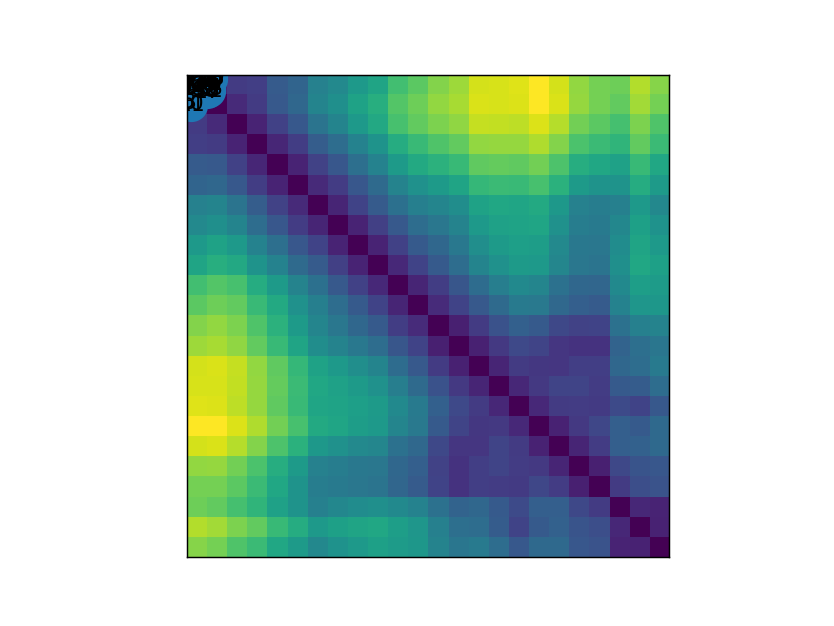

In [51]:
nx.draw_networkx(universe_glico.frames[250].results.graph)

In [ ]:
aminoacids_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.2_aminoacids.itp'
solvents_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.0_solvents.itp'
ions_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.0_ions.itp'
water_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.2.itp'
sugars_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/05-2020/martini_v2.0_sugars.itp'

In [ ]:
def get_molnames(path):
    name_list = []
    flag = False
    with open(path) as martini_amino:
        for line in martini_amino:
            if flag:
                name_list.append(line.split()[0])
                flag = False

            if len(line.split()) > 1:
                actual_line = line.split()

                actual_line = [i.split(';') for i in actual_line]
                if 'molname' in actual_line[1] or 'molname' in actual_line[0]:
                    flag = True
    return name_list

In [ ]:
uni = universe.select_atoms('not name W WF CL- NA+')

In [52]:
frame = 250

frame_dict = universe_glico.get_frame(frame)

frame_tensor = distance_tensor.get_coordinate_tensor_from_dict(frame_dict)

start_dist = timer()
frame_distance_maps = distance_tensor.compute_euclidean_norm_torch(frame_tensor)
end_dist = timer()
print('Time to compute distance is: ', (end_dist - start_dist))

start_contc = timer()
frame_contact = pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
end_contc = timer()
print('Time to compute contact is: ', (end_contc - start_contc))

start_den = timer()
frame_denoised, df = pattern_recognition.denoise_contact_maps(frame_contact)
end_den = timer()
print('Time to denoise: ', (end_den-start_den))

frame_graph_full = graph.graph_v1(frame_denoised, df)

subgraphs = graph.find_subgraph(frame_graph_full)  

Time to compute distance is:  0.335920793000696
Time to compute contact is:  4.676193053000134


100%|██████████| 27/27 [00:00<00:00, 108162.57it/s]

Time to denoise:  0.6295194160002211


<IPython.core.display.Javascript object>


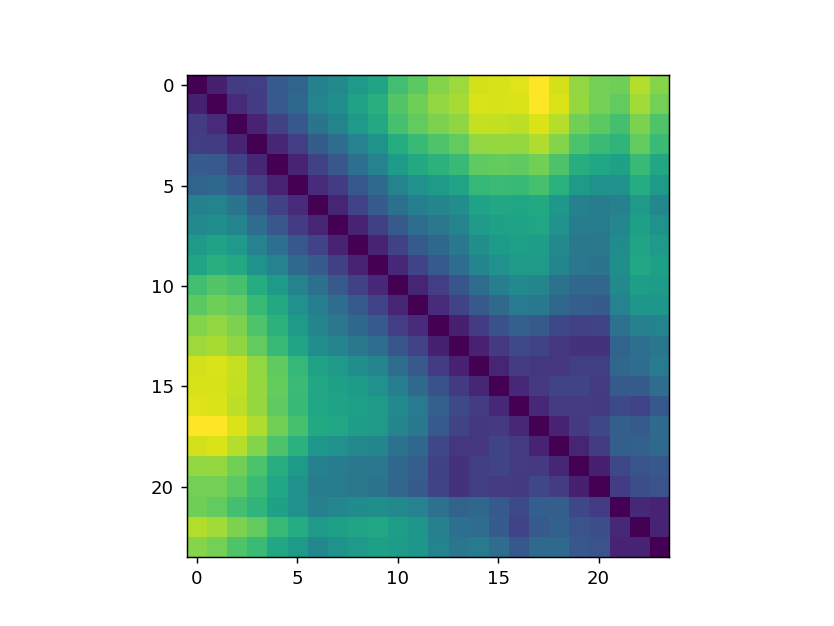

In [73]:
plt.imshow(frame_distance_maps[0][0])

<IPython.core.display.Javascript object>


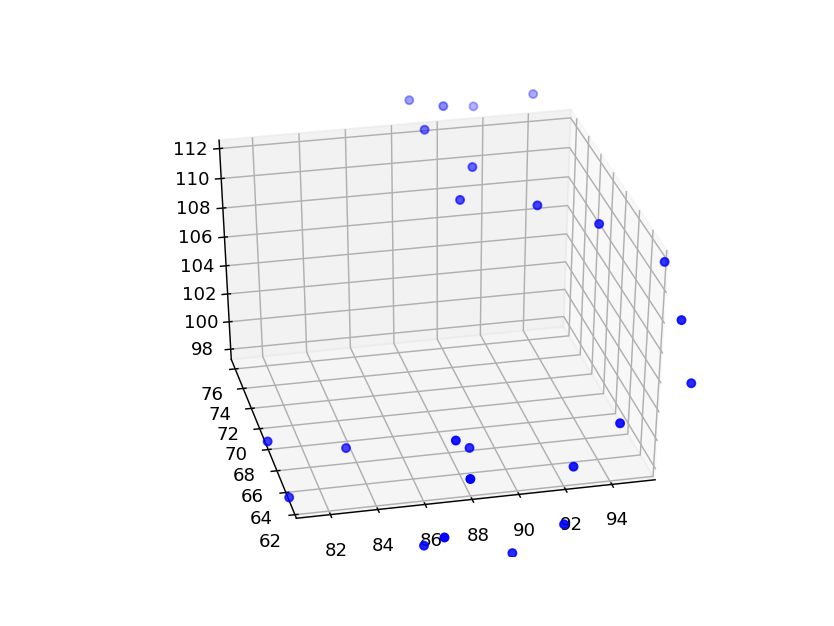

In [74]:
morphoscanner.plot.plot.plot_peptide_list(universe_glico.get_frame(250), [0])

<IPython.core.display.Javascript object>


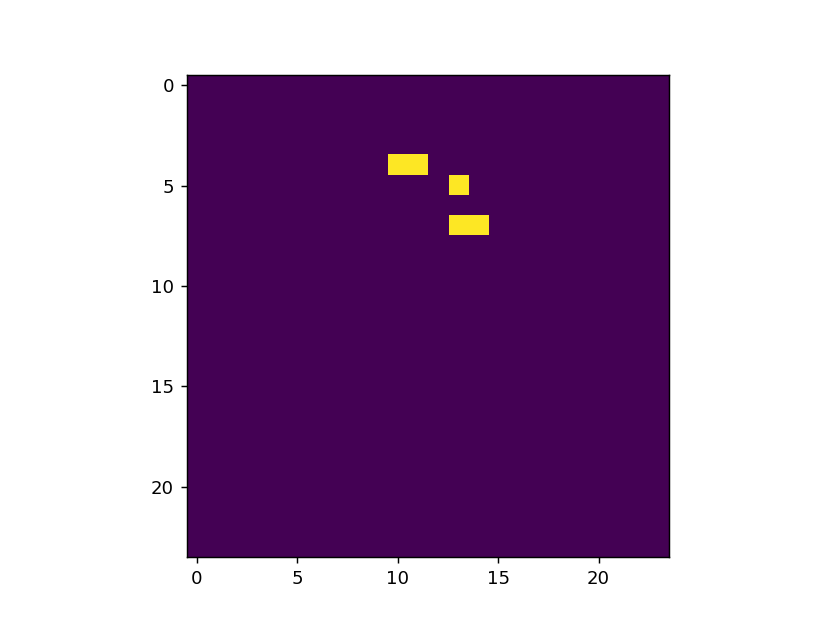

In [68]:
plt.imshow(frame_contact[0][25])

<IPython.core.display.Javascript object>


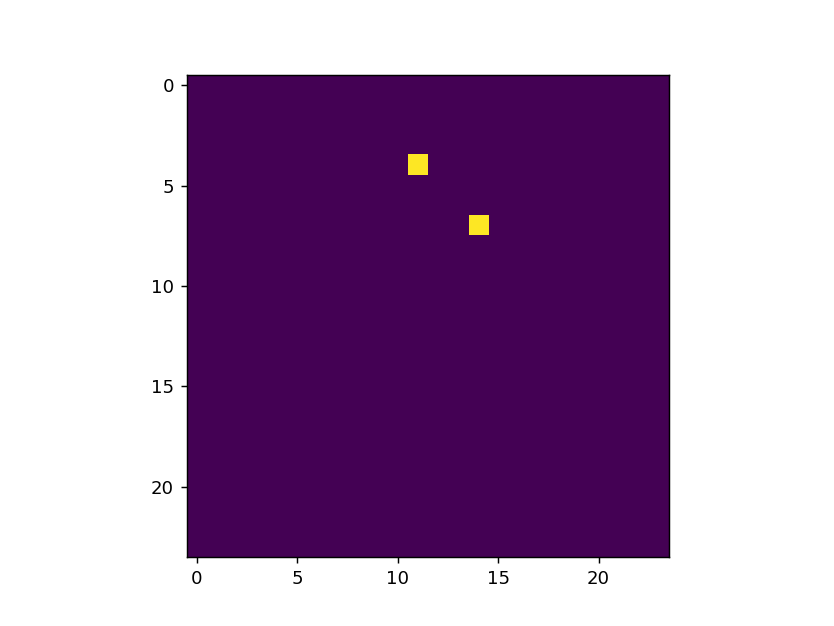

In [69]:
plt.imshow(frame_denoised[0][25])

In [75]:
universe_glico.frames[250].results.cross_correlation

,peptide1,peptide2,NCC Value,shift index,contacts,sense
0,0,25,0.216930,30,5.0,parallel
1,0,26,0.288675,7,6.0,antiparallel
2,1,14,0.196116,34,2.0,parallel
3,1,17,0.174078,36,3.0,antiparallel
4,1,38,0.258199,4,3.0,antiparallel
5,2,5,0.500000,1,2.0,parallel
6,2,8,0.288675,43,3.0,parallel
7,2,18,0.235702,17,4.0,antiparallel
8,2,37,0.195180,14,7.0,antiparallel
9,3,6,0.208514,24,4.0,antiparallel
